## Test new Orbit package for time series forecast

In [8]:
%matplotlib inline
import orbit
from orbit.utils.dataset import load_iclaims
from orbit.models.dlt import ETSFull
from orbit.diagnostics.plot import plot_predicted_data

In [9]:
# load data
df = load_iclaims()
df

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404
...,...,...,...,...,...,...,...
438,2018-05-27,12.220202,0.116342,-0.004795,0.052260,0.452972,-0.175192
439,2018-06-03,12.162763,0.134360,0.014254,0.052260,0.469082,-0.275119
440,2018-06-10,12.288984,0.134360,0.104405,0.063433,0.469308,-0.291676
441,2018-06-17,12.235743,0.097992,0.104405,0.029532,0.460354,-0.152422


In [12]:
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]
date_col = 'week'
response_col = 'claims'

In [13]:
dlt = ETSFull(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=8888,
)

In [14]:
%%time
dlt.fit(df=train_df)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_982090c5656030fa038b63e5c383dbff NOW.


CPU times: user 1.29 s, sys: 128 ms, total: 1.42 s
Wall time: 40.9 s


In [15]:
predicted_df = dlt.predict(df=test_df)

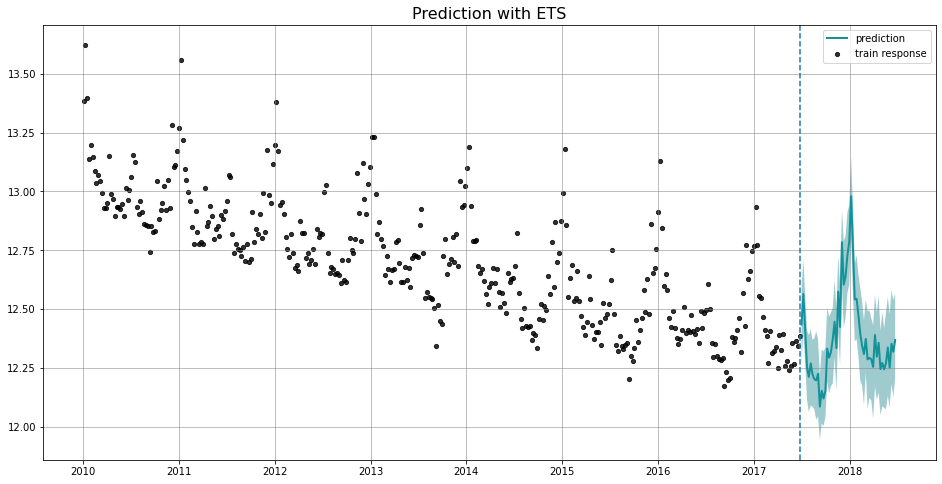

In [16]:
_ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETS')

In [19]:
import pandas as pd
df=pd.read_csv('data/DOT_histical_data.csv')
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]
date_col = 'date'
response_col = 'close'

dlt = ETSFull(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=8888,
)


In [20]:
%%time
dlt.fit(df=train_df)

CPU times: user 105 ms, sys: 69 ms, total: 174 ms
Wall time: 697 ms


In [21]:
predicted_df = dlt.predict(df=test_df)

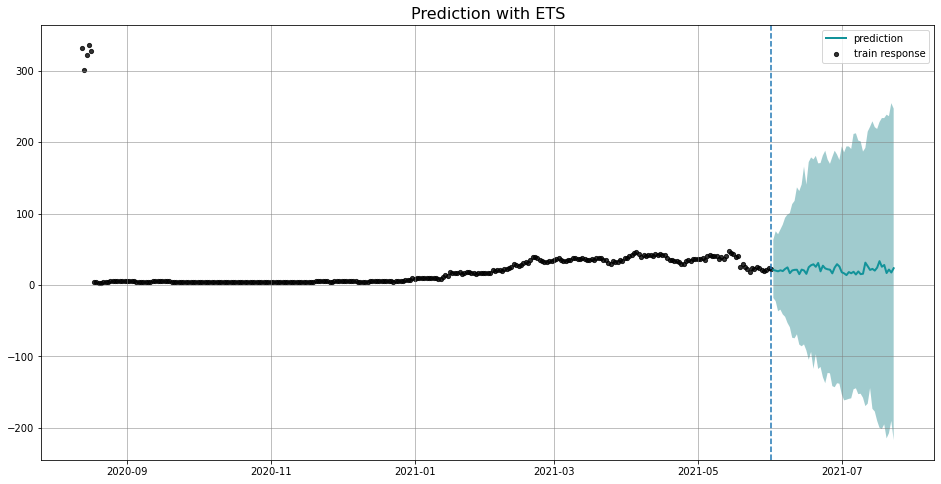

In [22]:
_ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETS')